<a href="https://colab.research.google.com/github/rupaidutta66/MACHINE-LEARNING-PROJECTS-/blob/main/LOAN_APPROVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/LoanApprovalPrediction.csv')


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
obj = (data.dtypes=='object')
len(list(obj[obj].index))

7

In [ ]:
data.drop(['Loan_ID'], axis = 1, inplace = True)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


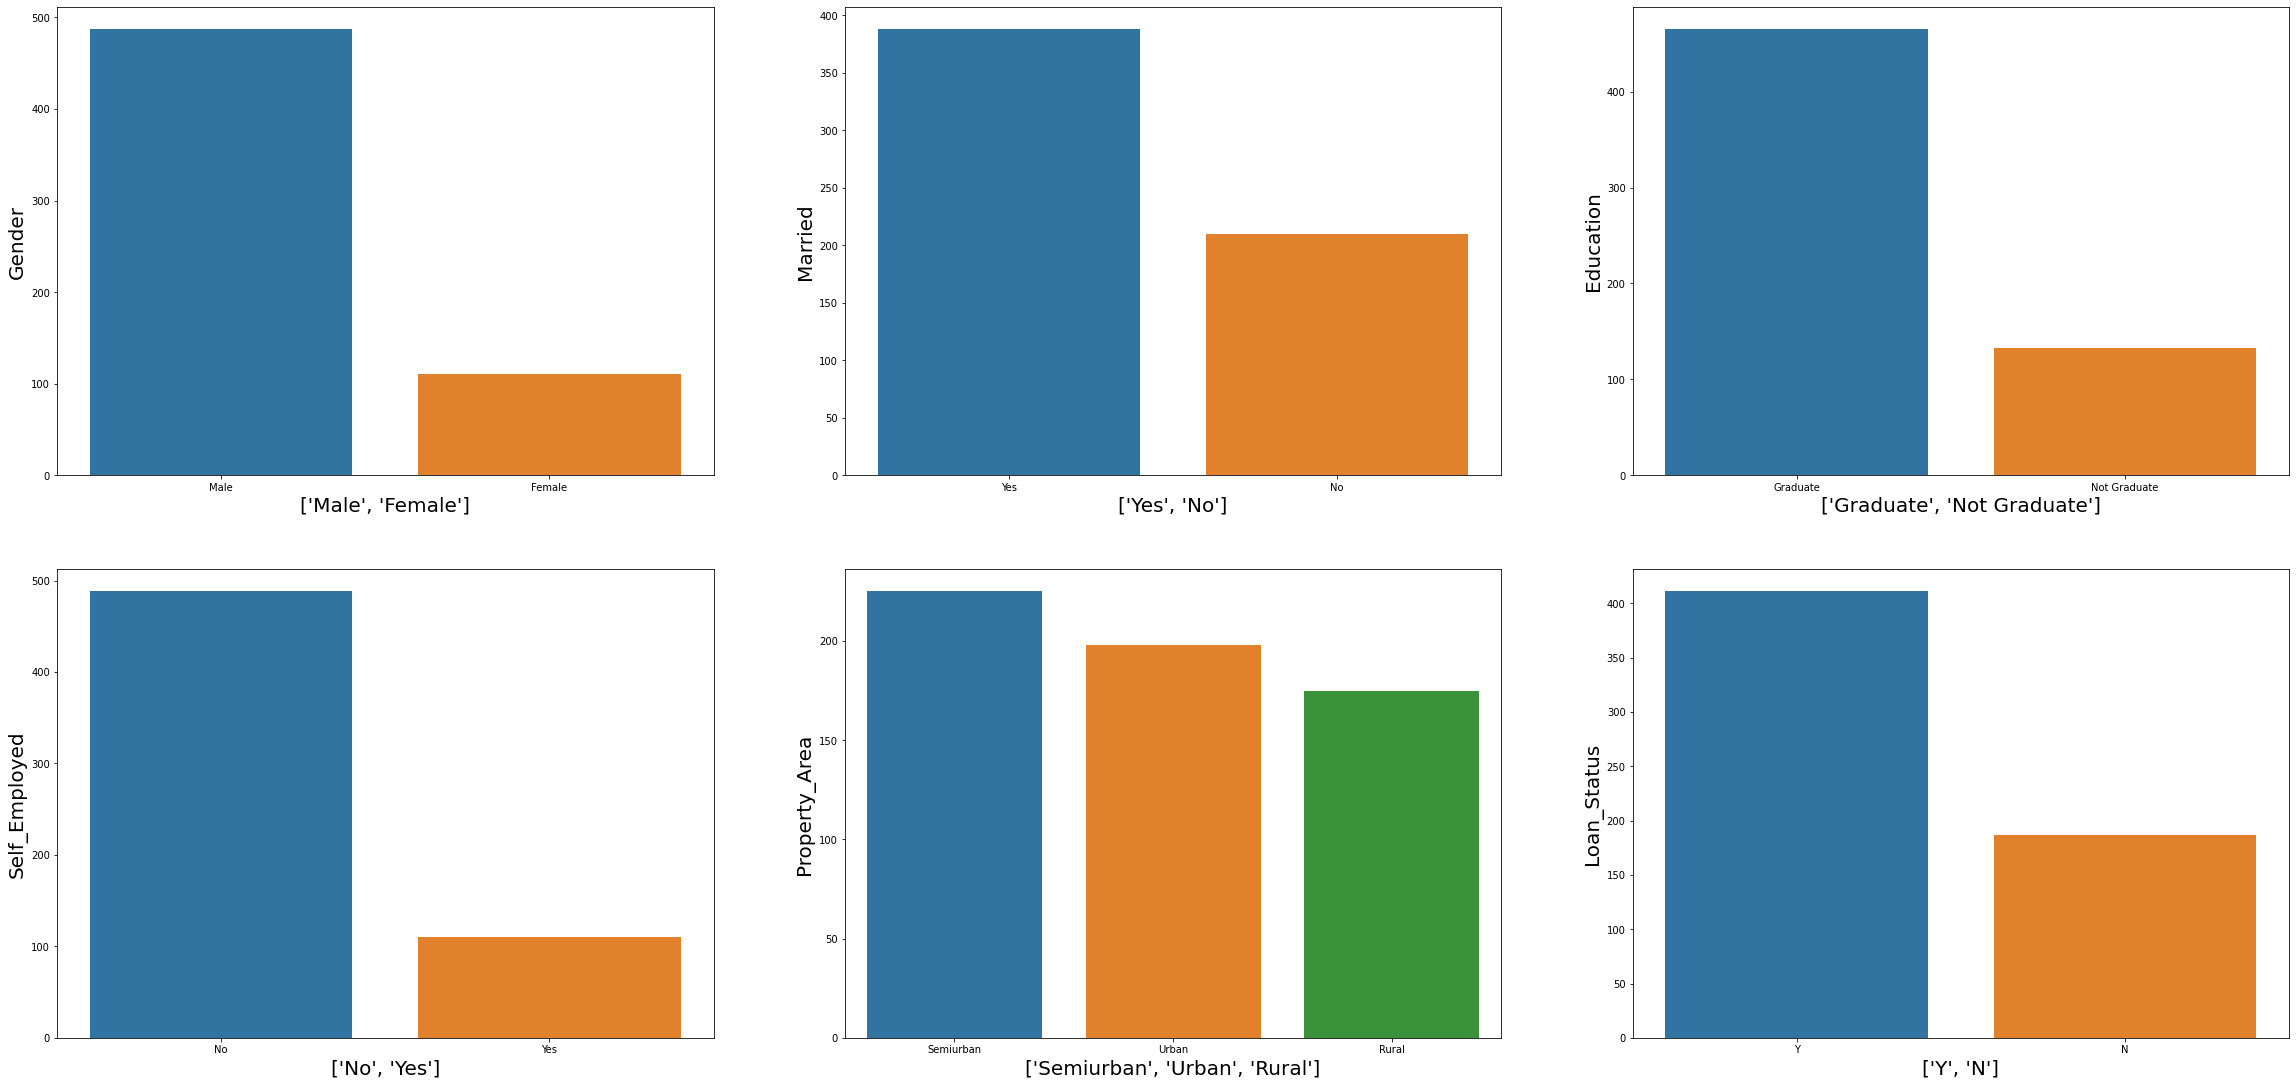

In [ ]:
obj =( data.dtypes=='object')
obj_col = list(obj[obj].index)
plt.figure(figsize = (40,50))
index = 1
for col in obj_col:
  y = data[col].value_counts()
  x = list(y.index)
  plt.subplot(5,3,index)
  plt.xlabel (x, fontsize = 20)
  plt.ylabel (col, fontsize = 20)
  sns.barplot(x = x, y = y)
  index += 1


In [ ]:
obj_col

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for col in obj_col:
  data[col] = label_encoder.fit_transform(data[col])

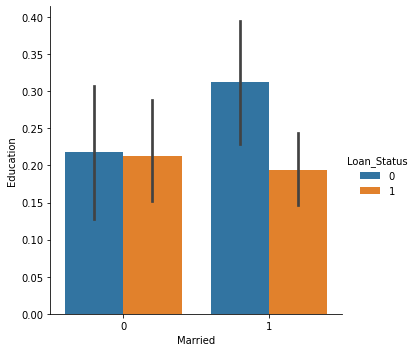

In [ ]:
sns.catplot(x = 'Married',
            y = 'Education',
            kind = 'bar',
            hue = 'Loan_Status',
            data = data)

In [ ]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'], axis = 1)
Y = data[['Loan_Status']]

X.shape, Y.shape

((598, 11), (598, 1))

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [74]:
X_train.shape, Y_train.shape

((418, 11), (418, 1))

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [78]:
knn = KNeighborsClassifier(n_neighbors = 4)
rfc = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state = 1)
svc = SVC()
lgr = LogisticRegression()

for clf in (knn, rfc, svc, lgr):
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_train)
  print('Accuracy of', clf.__class__.__name__,'=',
        100*accuracy_score(Y_pred, Y_train))


Accuracy of KNeighborsClassifier = 75.35885167464114
Accuracy of RandomForestClassifier = 99.04306220095694
Accuracy of SVC = 68.6602870813397
Accuracy of LogisticRegression = 80.14354066985646


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-78-9ab2c1560576>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [79]:
for clf in (knn, rfc, svc, lgr):
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print('Accuracy of', clf.__class__.__name__,'=',
        100*accuracy_score(Y_pred, Y_test))


Accuracy of KNeighborsClassifier = 54.44444444444444
Accuracy of RandomForestClassifier = 76.11111111111111
Accuracy of SVC = 69.44444444444444
Accuracy of LogisticRegression = 82.22222222222221


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-79-7fd173aaa13c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)